# Лекция 10. Matplotlib_1

1. Python Visualization Landscape


2. Простые графики
    
    2.1. Построение линий - `plot`
    
    2.2. Стиль линии и маркеры
    
    2.3. Подписи к осям и заголовок
    
    2.4. Легенда
    
    
3. Виды графиков

    3.1. Диаграмма рассеяния - `scatter`
    
        3.1.1. Цветовая шкала
    

## Python Visualization Landscape

![](https://rougier.github.io/python-visualization-landscape/landscape-colors.png)

https://pyviz.org/overviews/index.html

## Импорт модуля

`import matplotlib.pyplot as plt` - стандартный способ импорта

`import matplotlib` - для точного контроля всех аспектов графиков

## `plot`

Рисует ломаную линию, соединяющую заданный набор точек в двумерном пространстве.

Некоторые варианты вызова функции:

- `plt.plot(y, ...)` - вместо координат x берет 0, 1, 2, ...
- `plt.plot(x, y, ...)` - рисует линию, каждый вызов циклирует цвет
- `plt.plot(x, y, ls, ...)` - рисует линию заданного стиля
- `plt.plot(x1, y1, ls1, x2, y2, ls2, ...)` - рисует несколько линий заданных стилей


In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

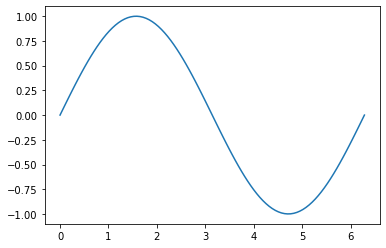

In [2]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.plot(x, y)

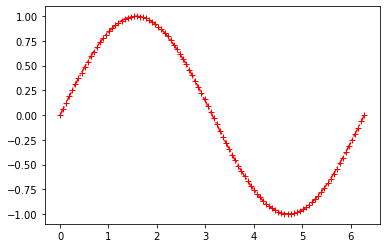

In [5]:
# задать цвет и стиль линии, а также
plt.plot(x, y, '-.r+')

### Стили линий
https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html
![](https://matplotlib.org/_images/sphx_glr_line_styles_reference_001.png)

In [9]:
matplotlib.lines.Line2D.lineStyles

{'-': '_draw_solid',
 '--': '_draw_dashed',
 '-.': '_draw_dash_dot',
 ':': '_draw_dotted',
 'None': '_draw_nothing',
 ' ': '_draw_nothing',
 '': '_draw_nothing'}

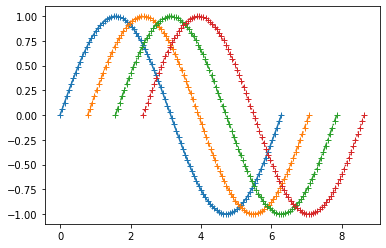

In [10]:
linestyles = list(matplotlib.lines.Line2D.lineStyles)[:4]
dx = np.pi/4

for i, style in enumerate(linestyles):
    plt.plot(x+i*dx, y, style + '+')

### Виды маркеров
https://matplotlib.org/3.1.1/api/markers_api.html

In [14]:
matplotlib.lines.Line2D.markers

{'.': 'point',
 ',': 'pixel',
 'o': 'circle',
 'v': 'triangle_down',
 '^': 'triangle_up',
 '<': 'triangle_left',
 '>': 'triangle_right',
 '1': 'tri_down',
 '2': 'tri_up',
 '3': 'tri_left',
 '4': 'tri_right',
 '8': 'octagon',
 's': 'square',
 'p': 'pentagon',
 '*': 'star',
 'h': 'hexagon1',
 'H': 'hexagon2',
 '+': 'plus',
 'x': 'x',
 'D': 'diamond',
 'd': 'thin_diamond',
 '|': 'vline',
 '_': 'hline',
 'P': 'plus_filled',
 'X': 'x_filled',
 0: 'tickleft',
 1: 'tickright',
 2: 'tickup',
 3: 'tickdown',
 4: 'caretleft',
 5: 'caretright',
 6: 'caretup',
 7: 'caretdown',
 8: 'caretleftbase',
 9: 'caretrightbase',
 10: 'caretupbase',
 11: 'caretdownbase',
 'None': 'nothing',
 None: 'nothing',
 ' ': 'nothing',
 '': 'nothing'}

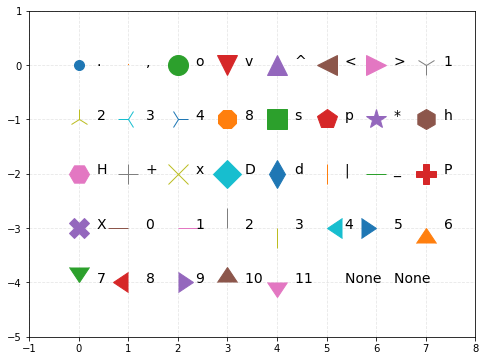

In [19]:
plt.figure(figsize=(8,6))
markers = list(matplotlib.lines.Line2D.markers)
n = len(markers)
cols = 8

for i in range(n):
    row, col = i // cols, i % cols
    plt.plot(col, -row, marker=markers[i], markersize=20)
    plt.text(col, -row, ' '*4+str(markers[i]), fontsize=14)
    
plt.xlim(-1, 8)
plt.ylim(-5, 1)
plt.grid(ls='--', alpha=0.3)

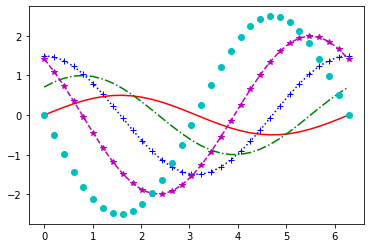

In [11]:
x = np.linspace(0, 2*np.pi, 32)
styles = ('r', '-.g', ':+b', '--*m', 'oc')

for i, s in enumerate(styles):
    plt.plot(x, (i+1)*0.5*np.sin(x + i*dx), s)

In [12]:
plt.legend?

## `legend`

Отображает легенду. Необходимо наличие надписей `label` у линий.

Синтаксис вызова:

`plt.legend(loc='best', ...)`

`loc` - положение легенды на рисунке


In [50]:
# варианты расположения легенды (loc)
import re
text = plt.legend.__doc__
ret = re.search(r'\s+[=]{15}.+[=]{13}', text, flags = re.M | re.DOTALL)
print(text[ret.start():ret.end()])



        ===============   =============
        Location String   Location Code
        ===============   =============
        'best'            0
        'upper right'     1
        'upper left'      2
        'lower left'      3
        'lower right'     4
        'right'           5
        'center left'     6
        'center right'    7
        'lower center'    8
        'upper center'    9
        'center'          10
        ===============   =============


In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


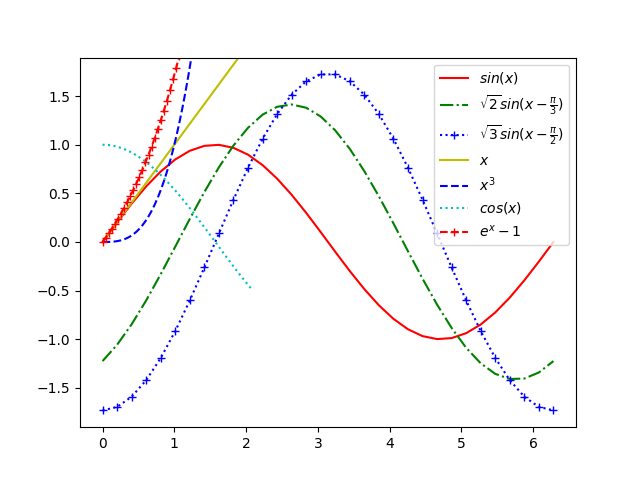

In [14]:
x = np.linspace(0, 2*np.pi, 32)
styles = ('-r', '-.g', ':+b', '--*m', '-oc')
funcs = (np.sin,
         lambda x: 2**0.5*np.sin(x - np.pi/3),
         lambda x: 3**0.5*np.sin(x - np.pi/2)
        )
labels = (r'$sin(x)$',
          r'$\sqrt{2} sin(x-\frac{\pi}{3})$',
          r'$\sqrt{3} sin(x-\frac{\pi}{2})$')

for f, s, l in zip(funcs, styles, labels):
    plt.plot(x, f(x), s, label=l)
    
plt.legend()

## Задание

Изобразить на одном рисунке графики функций: $x, x^3, cos(x), e^x-1$ на отрезке $[0, \frac{2\pi}{3}]$

Графики изобразить различными стилями (хотя бы одну с использованием маркеров), подписать и отобразить легенду.

$x^{-3}$

<IPython.core.display.Javascript object>


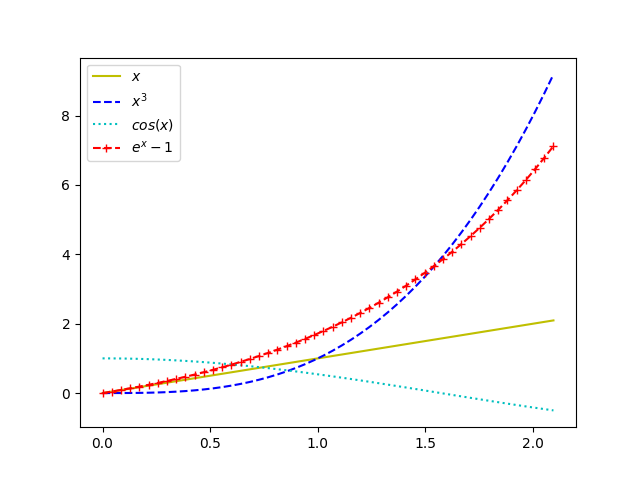

In [16]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi/3, 50)
styles = ('-y', '--b', ':c', '--+r')
funcs = (lambda x: x,
         lambda x: x**3,
         lambda x: np.cos(x),
         lambda x: np.exp(x) - 1
        )
labels = (r'$x$',
          r'$x^3$',
          r'$cos(x)$',
          r'$e^x - 1$')

for f, s, l in zip(funcs, styles, labels):
    plt.plot(x, f(x), s, label=l)
    
plt.legend()

<IPython.core.display.Javascript object>


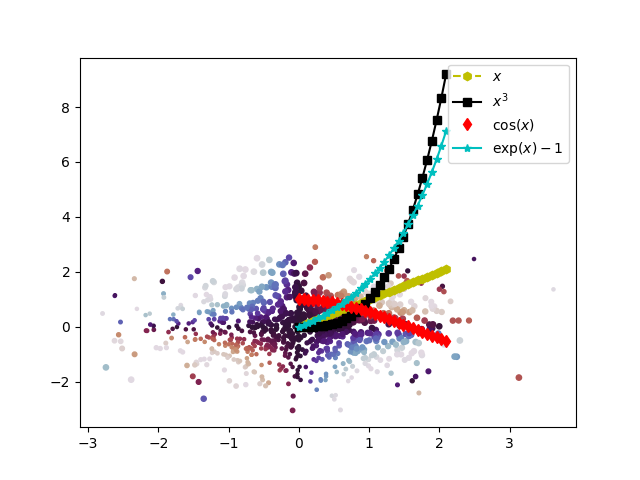

In [17]:
x = np.linspace(0, 2*np.pi/3, 32)
styles = ('--hy', '-sk', 'dr', '-*c')
funcs = (lambda x: x,
         lambda x: x**3,
         np.cos,
         lambda x: np.exp(x)-1,
        )
labels = (r'$x$',
          r'$x^3$',
          r'$\cos(x)$',
          r'$\exp(x)-1$')

for f, s, l in zip(funcs, styles, labels):
    plt.plot(x, f(x), s, label=l)
    
plt.legend()

$e^x$

## `scatter`

Рисует набор точек с возможностью задать для каждой свой цвет и размер

Синтаксис вызова:

`plt.scatter(x, y, c, s, cmap='viridis', ...)`

`x, y` - координаты точек

`с` - массив чисел, которые будут преобразованы в цвета при помощи цветовой карты `colormap`.

Цветовой картой можно управлять параметром `cmap`: [Matplotlib colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

`s` - массив чисел, задающих размер точки (площадь маркера)

In [19]:
rng = np.random.default_rng()

<IPython.core.display.Javascript object>


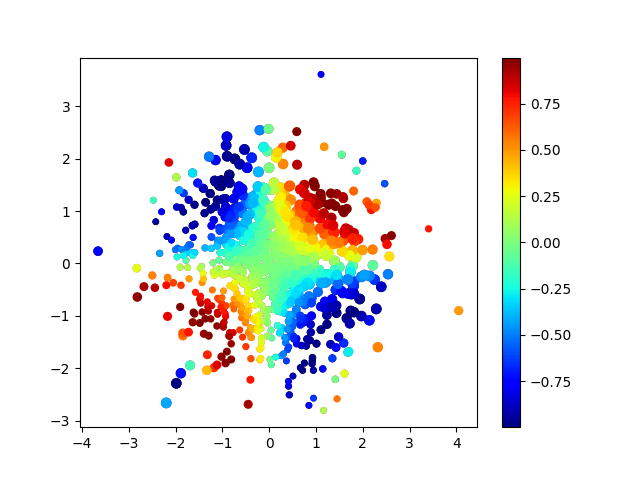

In [24]:
x = rng.normal(size=(30, 30))
y = rng.normal(size=(30, 30))
s = 30*(1+0.5*np.sin(x+y))
c = np.sin(x*y)
plt.scatter(x, y, c=c, s=s, cmap='magma')

## `colorbar`

Позволяет отобразить шкалу соответствия цветов и значений какого-либо параметра

Синтаксис вызова:

`plt.colorbar(mappable, ...)`

`mappable` - объект, объединяющий цветовую шкалу и нормализатор; такой объект обычно возвращают функции, рисующие цветные изображения `scatter`, `imshow`, `contourf`, ...


<IPython.core.display.Javascript object>


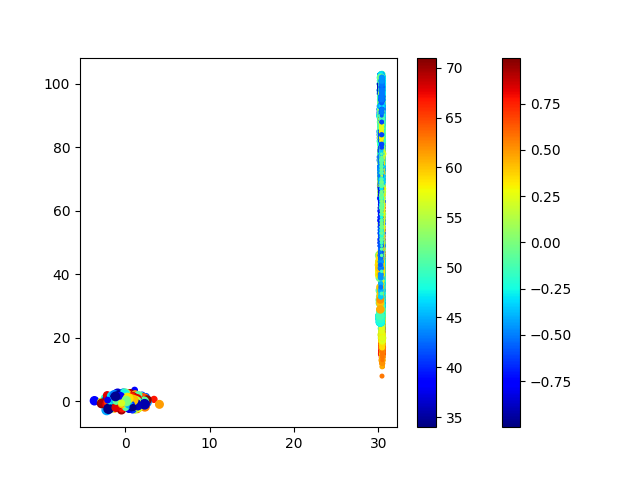

In [26]:
r = plt.scatter(x, y, c=c, s=s, cmap='jet')
plt.colorbar(r)

## Задание

[Датасет](https://www.kaggle.com/dronio/SolarEnergy)

| | | |
|-|-|-|
|0|UNIXTime|int
|1|Date|datetime
|2|Time|datetime
|3|Radiation|float
|4|Temperature|float
|5|Pressure|float
|6|Humidity|float
|7|WindDirection(Degrees)|float
|8|Speed|float
|9|TimeSunRise|datetime
|10|TimeSunSet|datetime

Построить `диаграмму рассеяния`, используя 4 столбца из датасета формата `float`.
Отобразить цветовую шкалу на том же рисунке.

Загрузить данные можно так:
```
np.loadtxt('SolarPrediction.csv', # имя файла
            skiprows=1,           # пропустить названия столбцов
            delimiter=',',        # разделитель
            usecols=range(3,9))   # какие столбцы загружать
```

In [27]:
arr = np.loadtxt('SolarPrediction.csv', # имя файла
                 skiprows=1,           # пропустить названия столбцов
                 delimiter=',',        # разделитель
                 usecols=range(3,9))   # какие столбцы загружать

In [28]:
arr.shape

(32686, 6)

In [31]:
a, b = arr[:,2].min(), arr[:,2].max()

In [33]:
s = (arr[:, 2] - a) / (b - a) * 30 + 5

<IPython.core.display.Javascript object>


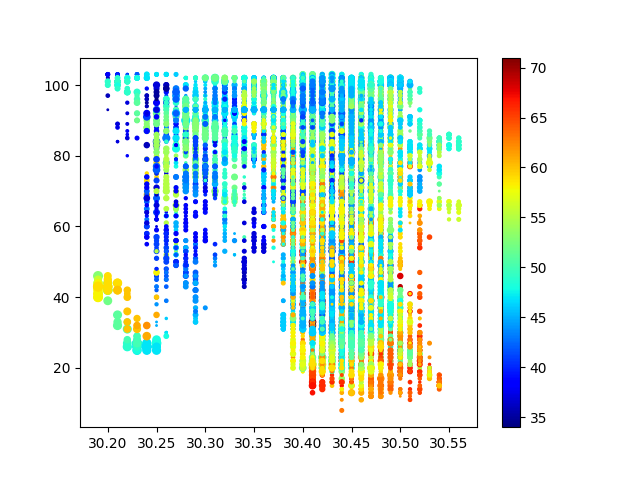

In [37]:
data = np.loadtxt('SolarPrediction.csv', # имя файла
            skiprows=1,           # пропустить названия столбцов
            delimiter=',',        # разделитель
            usecols=range(3,9))   # какие столбцы загружать
x = data[:, 2] #[i[2] for i in data]
y = [i[3] for i in data]
c = [i[1] for i in data]
s = [i[5] for i in data]
r = plt.scatter(x, y, c=c, s=s, cmap='jet')
plt.colorbar(r)